<a href="https://colab.research.google.com/github/canxiu-zhang/ML_YUniv/blob/main/ml_1010/ind_projects/ind1_Movie_ROI_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


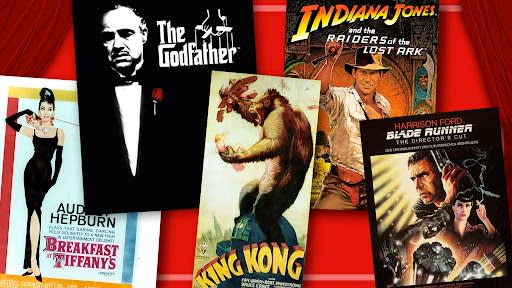
# Can we predict movie success?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
import datetime as dt
import pprint
%pprint
%matplotlib inline

Pretty printing has been turned OFF


In [15]:
df = pd.read_csv('../group_projects/tmdb_movies_data.csv')
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## By genre

### Top 10 movies by adjusted Revenue

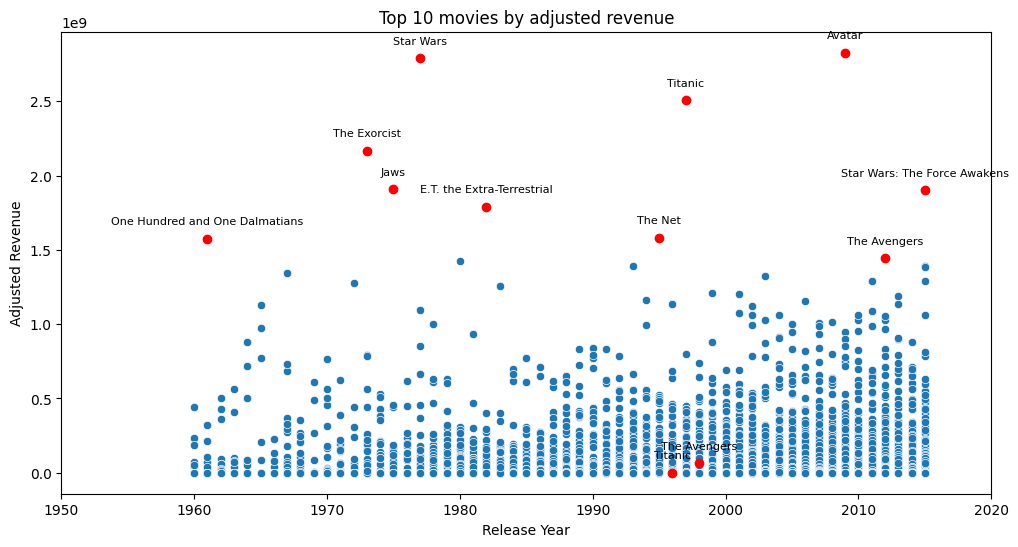

In [16]:
fig = plt.figure(figsize=(12,6))
# create scatter plot
ax = sns.scatterplot(data=df, x='release_year', y='revenue_adj')

# set top 10 revenue movies to different color
top10_movies = df.sort_values('revenue_adj', ascending=False).head(10)['original_title'].tolist()

for i, point in df.iterrows():
    if point['original_title'] in top10_movies:
        ax.scatter(point['release_year'], point['revenue_adj'], color='red')
        ax.annotate(point['original_title'], (point['release_year'], point['revenue_adj']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])
ax.set(title='Top 10 movies by adjusted revenue', xlabel='Release Year', ylabel='Adjusted Revenue')

plt.show()

In [17]:
df[df['original_title']=='Titanic']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/1997,4654,7.3,1997,2.716921e+08,2.506406e+09
8630,2699,tt0115392,0.219364,13000000,0,Titanic,Peter Gallagher|George C. Scott|Catherine Zeta...,NaN,Robert Lieberman,NaN,...,A story of the romances of two couples upon th...,173,Action|Drama|Romance,American Zoetrope,11/17/1996,21,6.1,1996,1.807282e+07,0.000000e+00


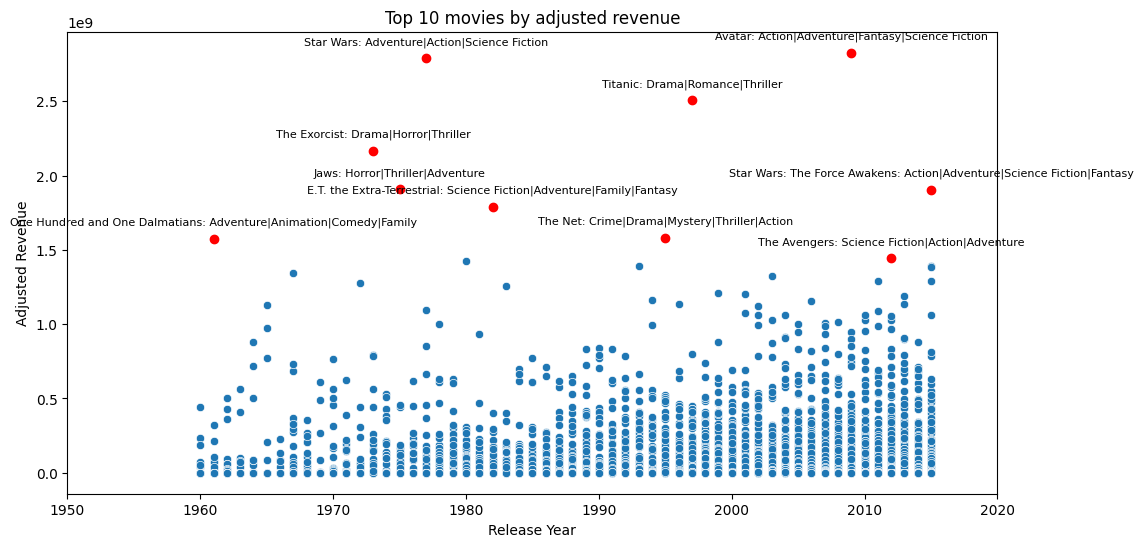

In [18]:
fig = plt.figure(figsize=(12,6))
# create scatter plot
ax = sns.scatterplot(data=df, x='release_year', y='revenue_adj')

# set top 10 revenue movies to different color
top10_movies = df.sort_values('revenue_adj', ascending=False).head(10)
top10_movies_title = [row['original_title'] for index, row in top10_movies.iterrows()]
top10_movies_id = [row['imdb_id'] for index, row in top10_movies.iterrows()]

for i, point in df.iterrows():
    if point['imdb_id'] in top10_movies_id:
        ax.scatter(point['release_year'], point['revenue_adj'], color='red')
        ax.annotate(point['original_title']+': '+point['genres'], (point['release_year'], point['revenue_adj']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])
ax.set(title='Top 10 movies by adjusted revenue', xlabel='Release Year', ylabel='Adjusted Revenue')

plt.show()

### Top 10 movies by ROI

ROI: Return on investment, the ratio of net profit over the total cost of the investment

ROI = (Revenue-Budget)/Budget

In [19]:
len(df[df['budget_adj']==0])

5696

In [20]:
len(df[df['budget_adj']<1000])

5754

In [21]:
df['roi'] = df.apply(lambda row: (row['revenue_adj'] - row['budget_adj'])/row['budget_adj'] if row['budget_adj']>1000 else 'NA', axis=1)

In [23]:
len(df[df['roi']=='NA'])

5754

In [26]:
df_roi = df[df['roi']!='NA']

In [27]:
df_roi.to_csv('movie_data_roi.csv')

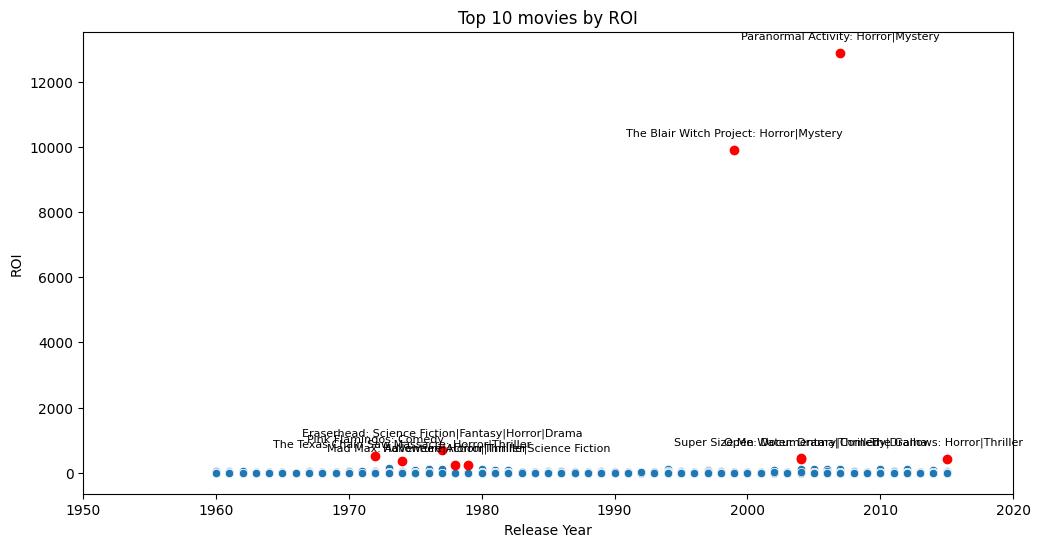

In [28]:
fig = plt.figure(figsize=(12,6))
# create scatter plot
ax = sns.scatterplot(data=df_roi, x='release_year', y='roi')

# set top 10 revenue movies to different color
top10_movies = df_roi.sort_values('roi', ascending=False).head(10)
top10_movies_title = [row['original_title'] for index, row in top10_movies.iterrows()]
top10_movies_id = [row['imdb_id'] for index, row in top10_movies.iterrows()]

for i, point in df_roi.iterrows():
    if point['imdb_id'] in top10_movies_id:
        ax.scatter(point['release_year'], point['roi'], color='red')
        ax.annotate(point['original_title']+': '+point['genres'], (point['release_year'], point['roi']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])
ax.set(title='Top 10 movies by ROI', xlabel='Release Year', ylabel='ROI')

plt.show()

In [29]:
df_roi[df_roi['original_title'] == 'Paranormal Activity']['roi']

7447    12889.386664
Name: roi, dtype: object

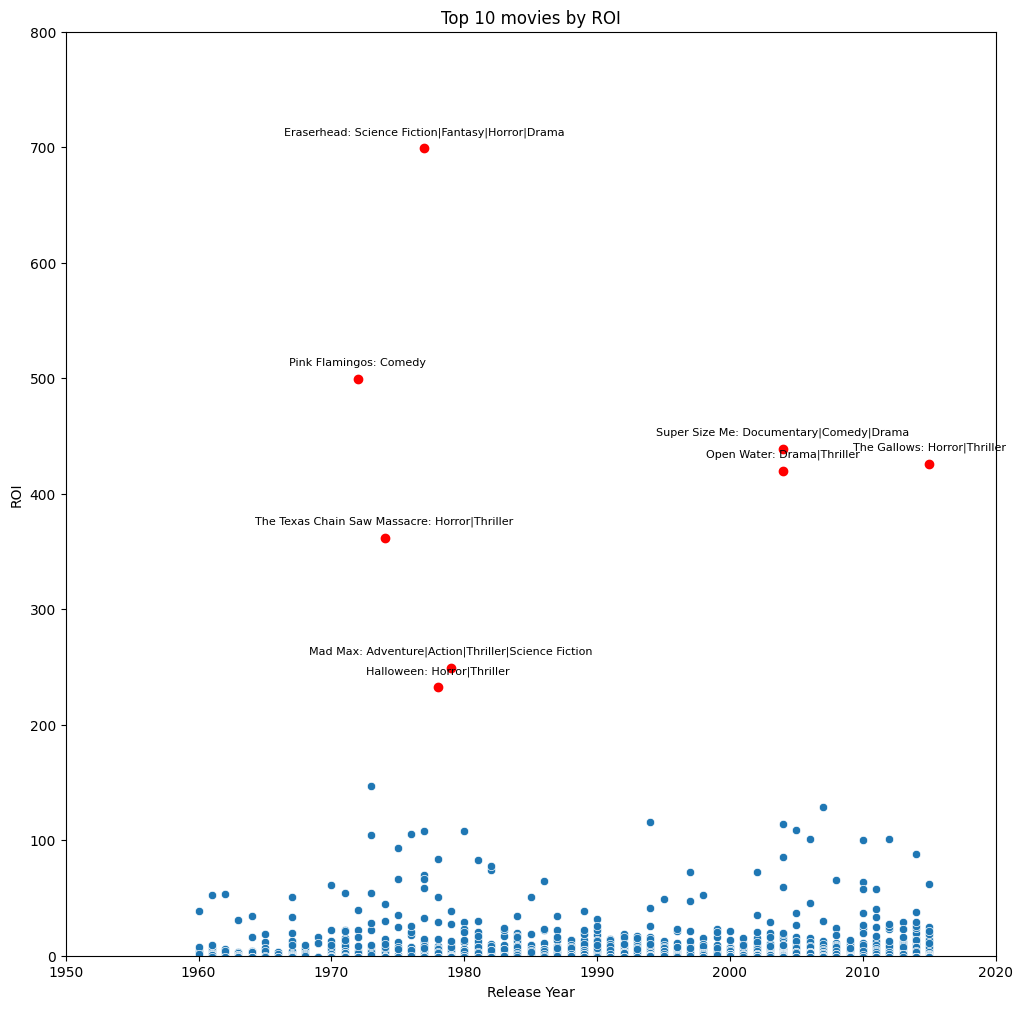

In [30]:
fig = plt.figure(figsize=(12,12))
# create scatter plot
ax = sns.scatterplot(data=df_roi, x='release_year', y='roi')

# set top 10 revenue movies to different color
top10_movies = df_roi.sort_values('roi', ascending=False).head(10)
top10_movies_title = [row['original_title'] for index, row in top10_movies.iterrows()]
top10_movies_id = [row['imdb_id'] for index, row in top10_movies.iterrows()]

for i, point in df_roi.iterrows():
    if point['imdb_id'] in top10_movies_id:
        ax.scatter(point['release_year'], point['roi'], color='red')
        ax.annotate(point['original_title']+': '+point['genres'], (point['release_year'], point['roi']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# show every 10 years on x-axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])

ax.set_ylim(0, 800)

ax.set(title='Top 10 movies by ROI', xlabel='Release Year', ylabel='ROI')

plt.show()

### Visual ROI with part-to-whole

Part-to-Whole: charts show how much of a whole an individual part takes up.

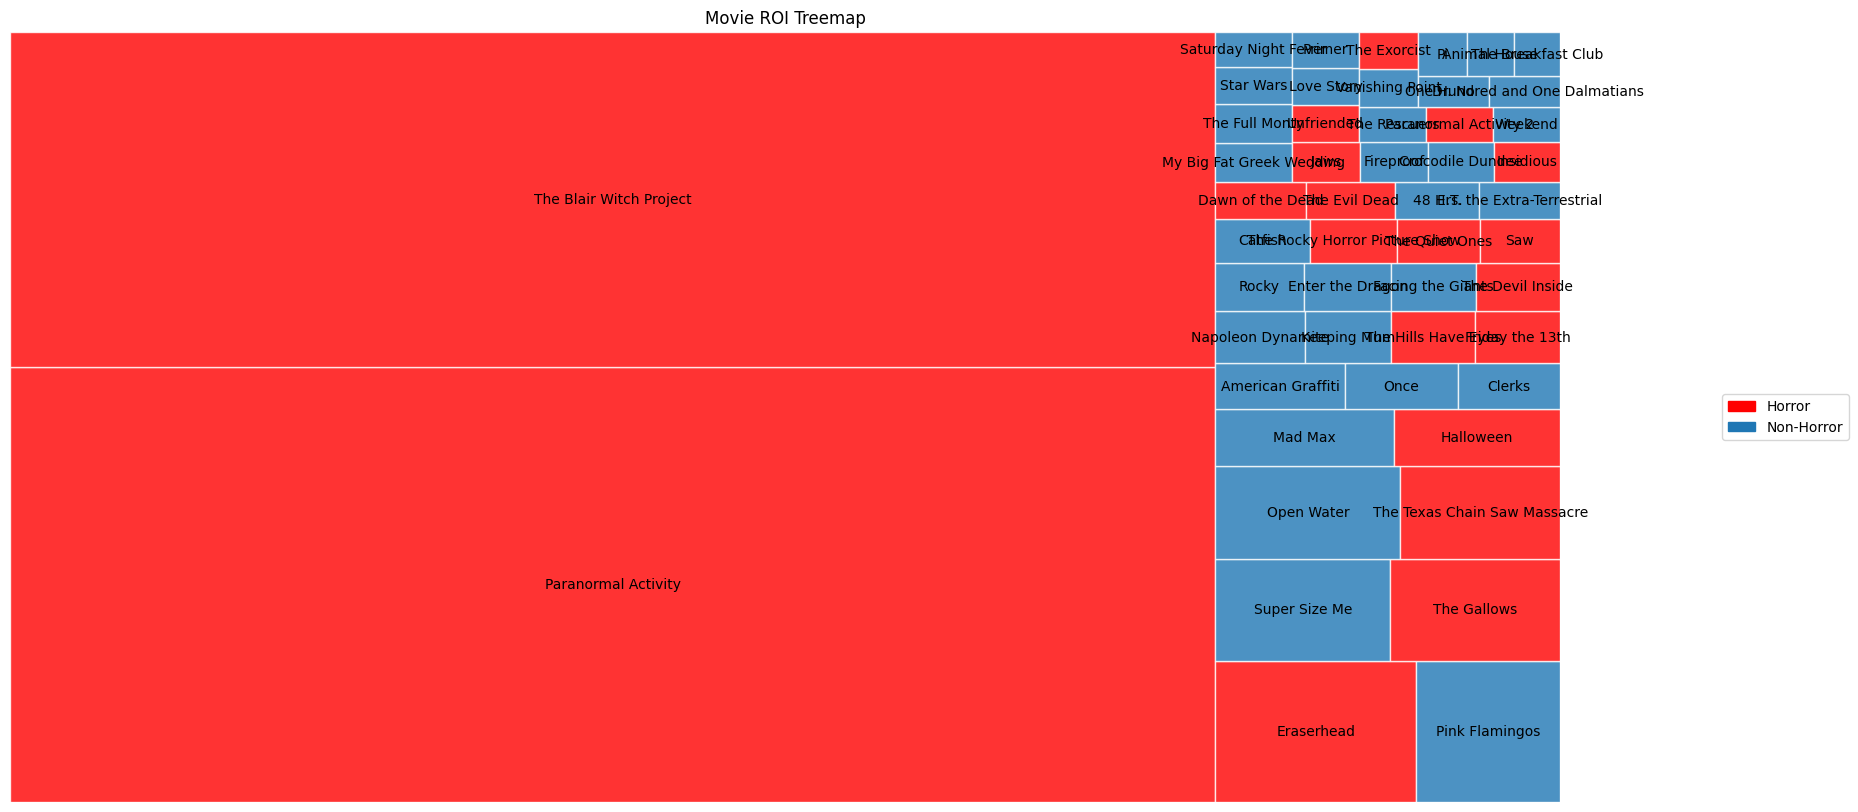

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

# create sample data
# set top 10 revenue movies to different color
top50_movies = df_roi.sort_values('roi', ascending=False).head(50)
top50_movies_title = [row['original_title'] for index, row in top50_movies.iterrows()]
top50_movies_id = [row['imdb_id'] for index, row in top50_movies.iterrows()]

data = top50_movies

df = data

# define color palette
blue = '#1f77b4'

# add color column based on genre
df['color'] = df['genres'].apply(lambda x: 'red' if 'Horror' in x else blue)

# calculate treemap sizes
sizes = df['roi'].values
labels = df['original_title'].values
colors = df['color'].values

# define function to map square size to font size
def adjust_font_size(size):
    return int(0.05*size)


# create treemap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, edgecolor='white', text_kwargs={'fontsize':10})

# set title and axis labels
plt.title('Movie ROI Treemap')
plt.axis('off')

# add legend
horror_patch = mpatches.Patch(color='red', label='Horror')
non_horror_patch = mpatches.Patch(color=blue, label='Non-Horror')
plt.legend(handles=[horror_patch, non_horror_patch], loc='center left', bbox_to_anchor=(1.1, 0.5))

# show plot
plt.show()


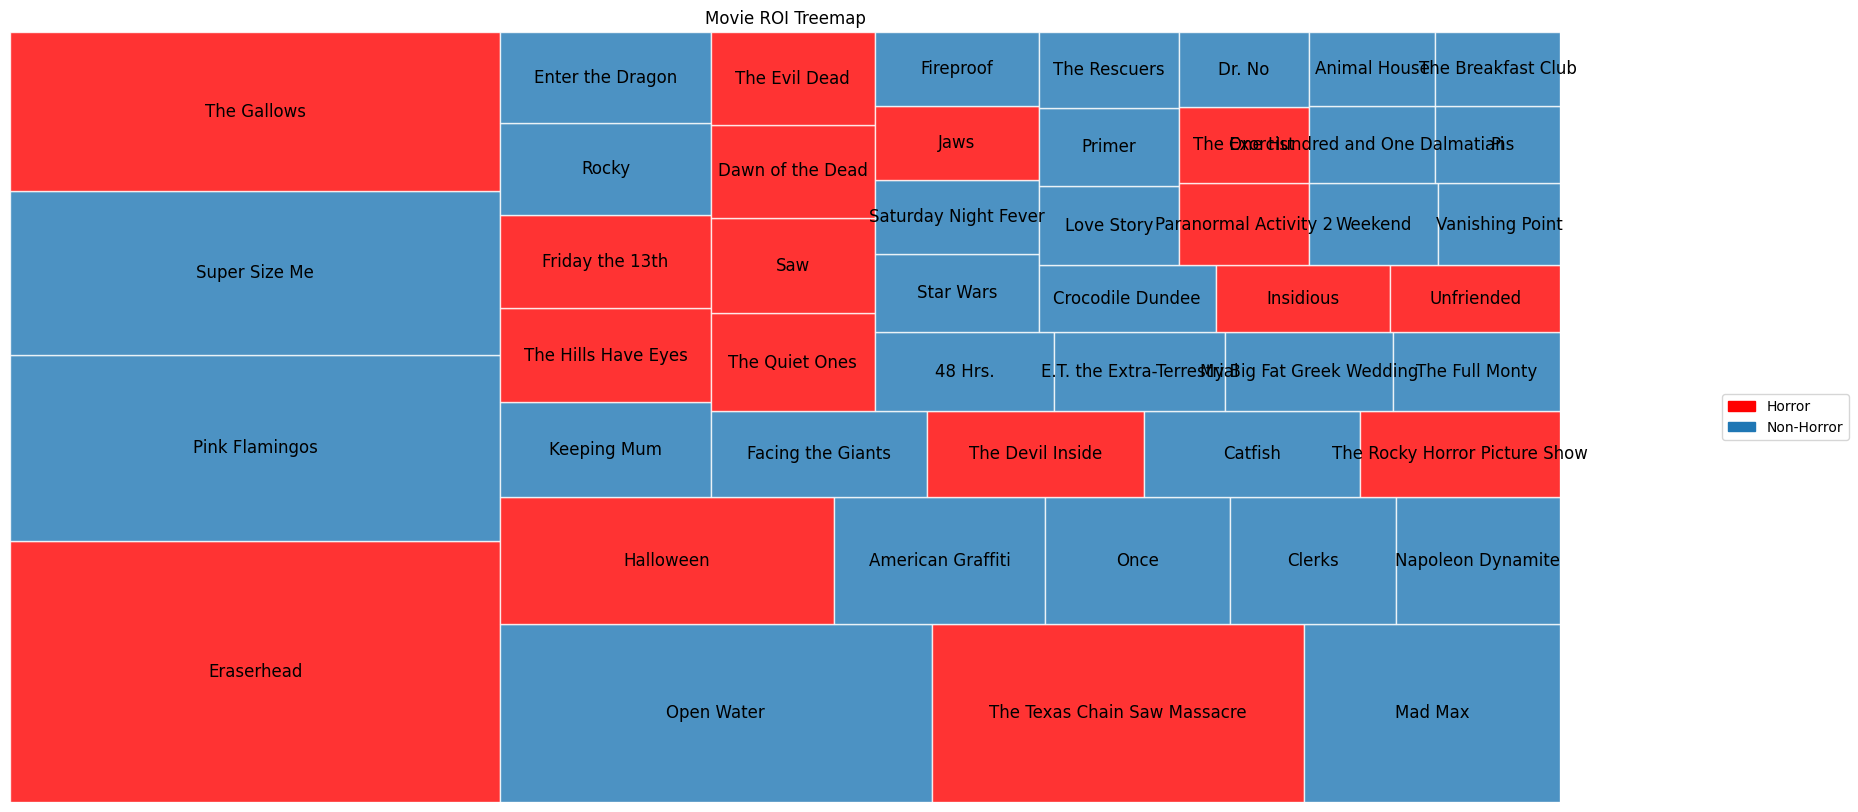

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

# create sample data
# set top 10 revenue movies to different color
top50_movies = df_roi.sort_values('roi', ascending=False).head(50)
top50_movies_title = [row['original_title'] for index, row in top50_movies.iterrows()]
top50_movies_id = [row['imdb_id'] for index, row in top50_movies.iterrows()]

data = top50_movies

df = pd.DataFrame(data[2:])
# df = data

# define color palette
blue = '#1f77b4'

# add color column based on genre
df['color'] = df['genres'].apply(lambda x: 'red' if 'Horror' in x else blue)

# calculate treemap sizes
sizes = df['roi'].values
labels = df['original_title'].values
colors = df['color'].values

# define function to map square size to font size
def adjust_font_size(size):
    return int(0.05*size)


# create treemap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, edgecolor='white', text_kwargs={'fontsize':12})

# set title and axis labels
plt.title('Movie ROI Treemap')
plt.axis('off')

# add legend
horror_patch = mpatches.Patch(color='red', label='Horror')
non_horror_patch = mpatches.Patch(color=blue, label='Non-Horror')
plt.legend(handles=[horror_patch, non_horror_patch], loc='center left', bbox_to_anchor=(1.1, 0.5))

# show plot
plt.show()


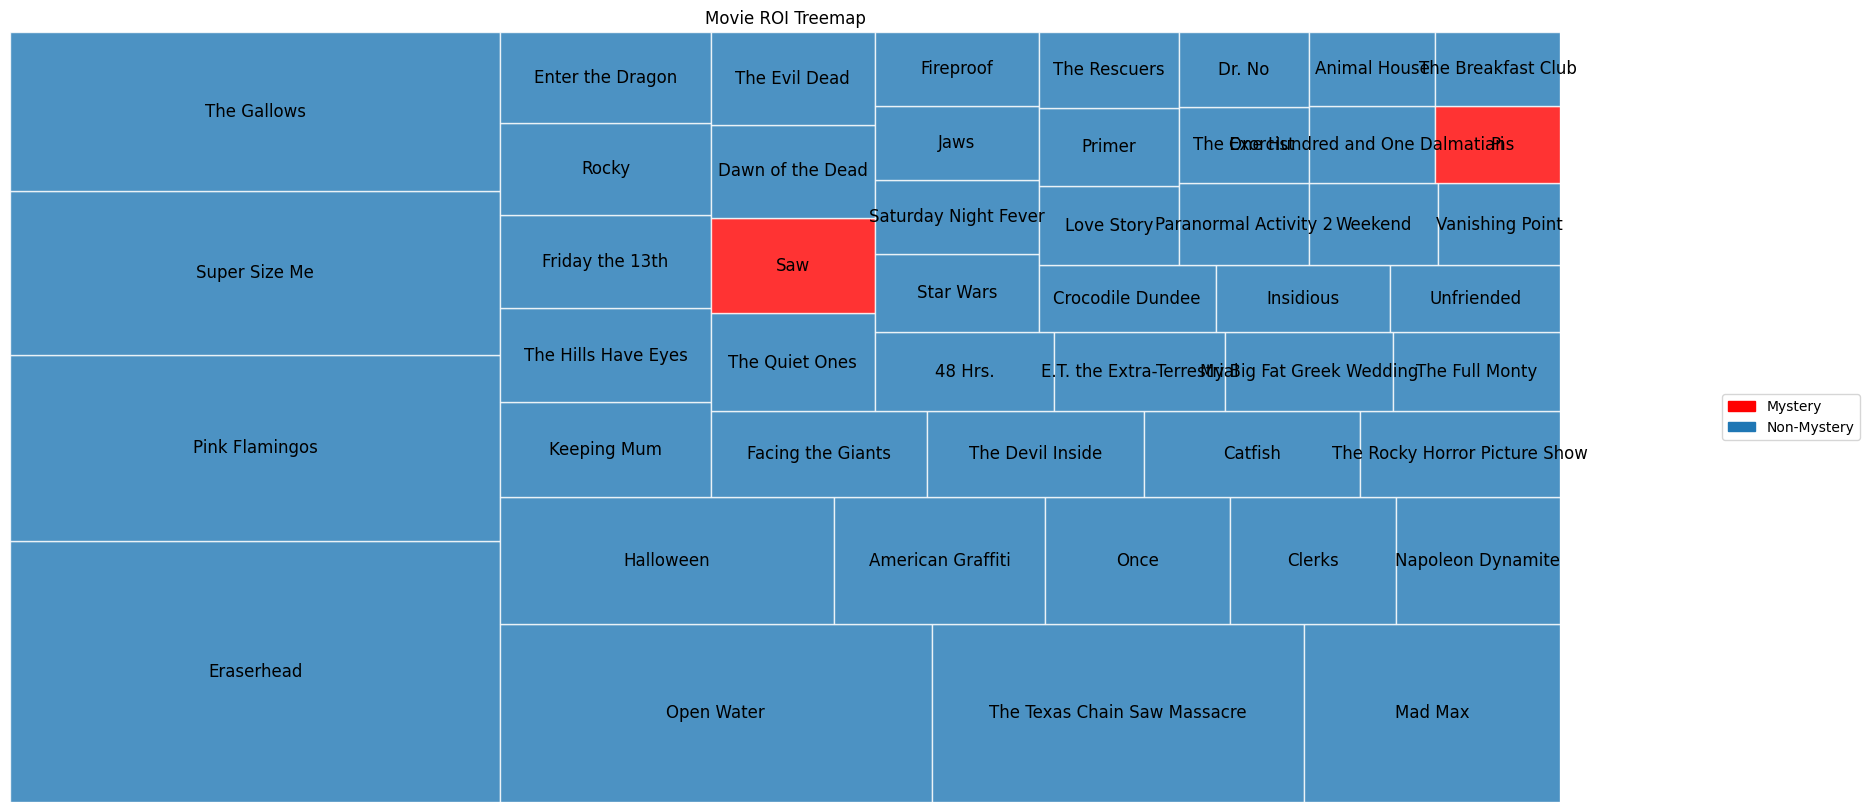

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

# create sample data
# set top 10 revenue movies to different color
top50_movies = df_roi.sort_values('roi', ascending=False).head(50)
top50_movies_title = [row['original_title'] for index, row in top50_movies.iterrows()]
top50_movies_id = [row['imdb_id'] for index, row in top50_movies.iterrows()]

data = top50_movies

df = pd.DataFrame(data[2:])
# df = data

# define color palette
blue = '#1f77b4'

# add color column based on genre
df['color'] = df['genres'].apply(lambda x: 'red' if 'Mystery' in x else blue)

# calculate treemap sizes
sizes = df['roi'].values
labels = df['original_title'].values
colors = df['color'].values

# define function to map square size to font size
def adjust_font_size(size):
    return int(0.05*size)


# create treemap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, edgecolor='white', text_kwargs={'fontsize':12})

# set title and axis labels
plt.title('Movie ROI Treemap')
plt.axis('off')

# add legend
horror_patch = mpatches.Patch(color='red', label='Mystery')
non_horror_patch = mpatches.Patch(color=blue, label='Non-Mystery')
plt.legend(handles=[horror_patch, non_horror_patch], loc='center left', bbox_to_anchor=(1.1, 0.5))

# show plot
plt.show()


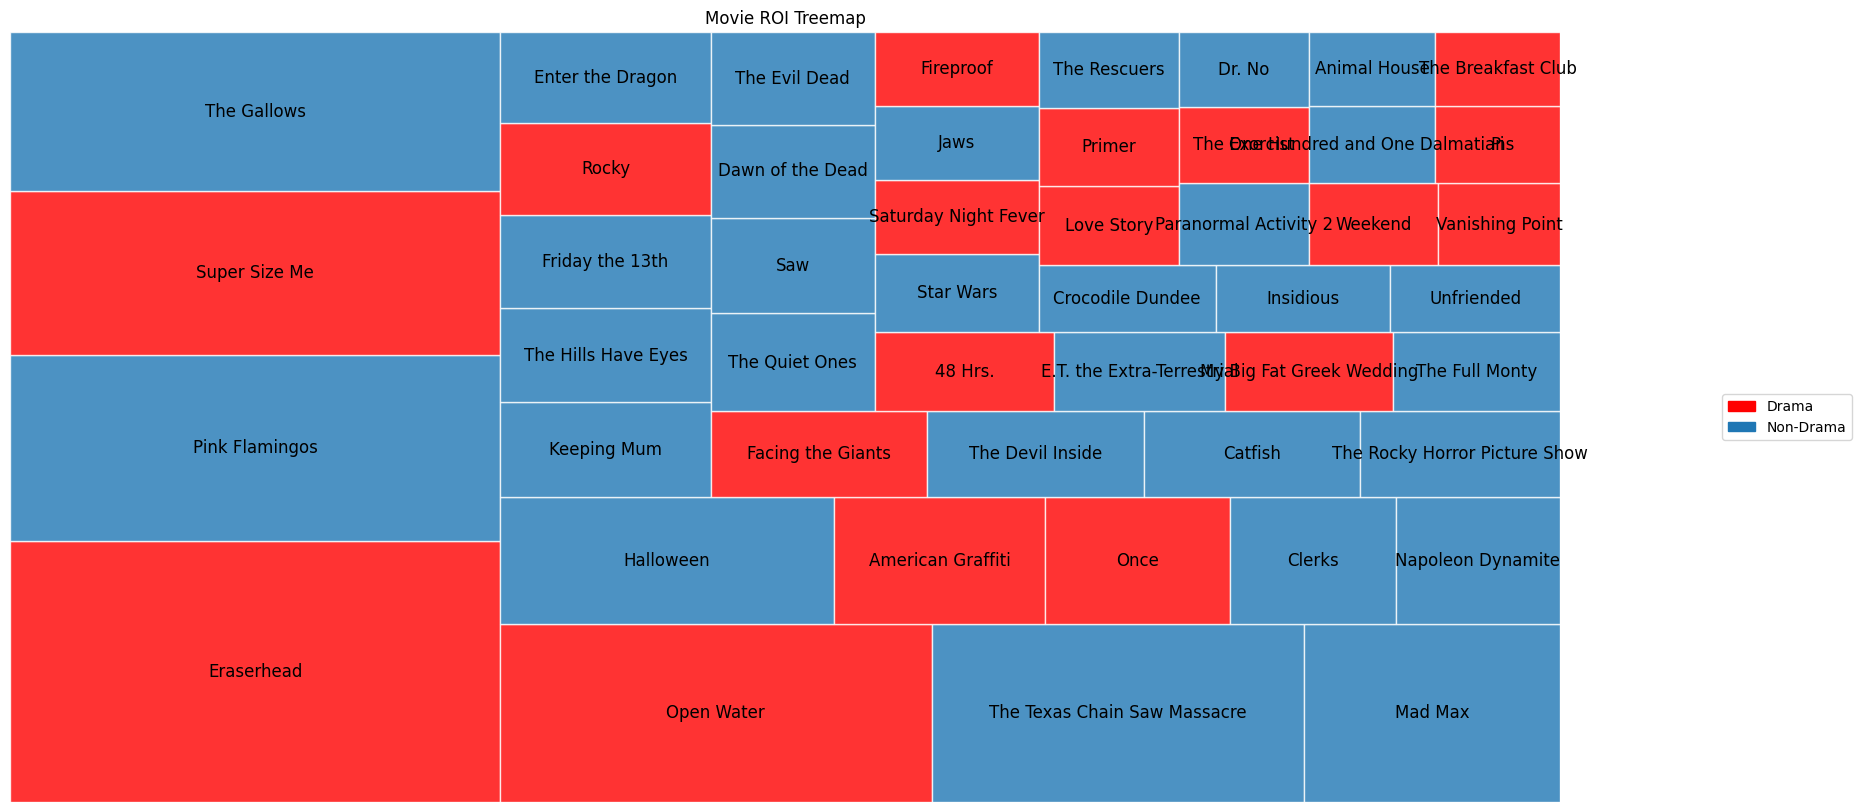

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

# create sample data
# set top 10 revenue movies to different color
top50_movies = df_roi.sort_values('roi', ascending=False).head(50)
top50_movies_title = [row['original_title'] for index, row in top50_movies.iterrows()]
top50_movies_id = [row['imdb_id'] for index, row in top50_movies.iterrows()]

data = top50_movies

df = pd.DataFrame(data[2:])
# df = data

# define color palette
blue = '#1f77b4'

# add color column based on genre
df['color'] = df['genres'].apply(lambda x: 'red' if 'Drama' in x else blue)

# calculate treemap sizes
sizes = df['roi'].values
labels = df['original_title'].values
colors = df['color'].values

# define function to map square size to font size
def adjust_font_size(size):
    return int(0.05*size)


# create treemap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, edgecolor='white', text_kwargs={'fontsize':12})

# set title and axis labels
plt.title('Movie ROI Treemap')
plt.axis('off')

# add legend
horror_patch = mpatches.Patch(color='red', label='Drama')
non_horror_patch = mpatches.Patch(color=blue, label='Non-Drama')
plt.legend(handles=[horror_patch, non_horror_patch], loc='center left', bbox_to_anchor=(1.1, 0.5))

# show plot
plt.show()


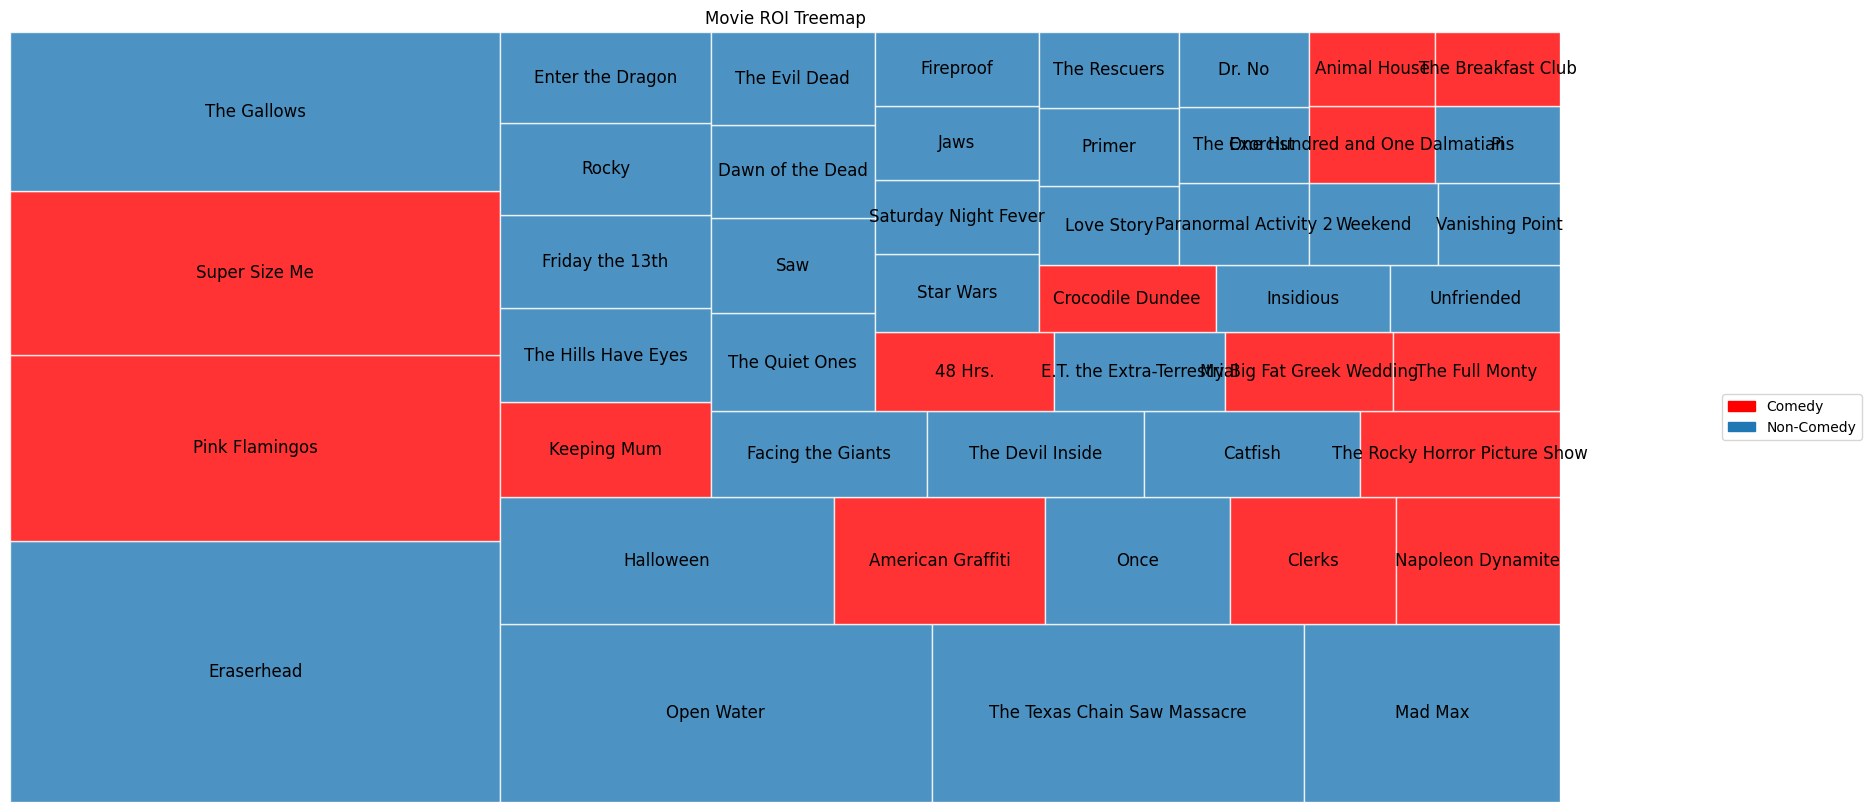

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

# create sample data
# set top 10 revenue movies to different color
top50_movies = df_roi.sort_values('roi', ascending=False).head(50)
top50_movies_title = [row['original_title'] for index, row in top50_movies.iterrows()]
top50_movies_id = [row['imdb_id'] for index, row in top50_movies.iterrows()]

data = top50_movies

df = pd.DataFrame(data[2:])
# df = data

# define color palette
blue = '#1f77b4'

# add color column based on genre
df['color'] = df['genres'].apply(lambda x: 'red' if 'Comedy' in x else blue)

# calculate treemap sizes
sizes = df['roi'].values
labels = df['original_title'].values
colors = df['color'].values

# define function to map square size to font size
def adjust_font_size(size):
    return int(0.05*size)


# create treemap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, edgecolor='white', text_kwargs={'fontsize':12})

# set title and axis labels
plt.title('Movie ROI Treemap')
plt.axis('off')

# add legend
horror_patch = mpatches.Patch(color='red', label='Comedy')
non_horror_patch = mpatches.Patch(color=blue, label='Non-Comedy')
plt.legend(handles=[horror_patch, non_horror_patch], loc='center left', bbox_to_anchor=(1.1, 0.5))

# show plot
plt.show()


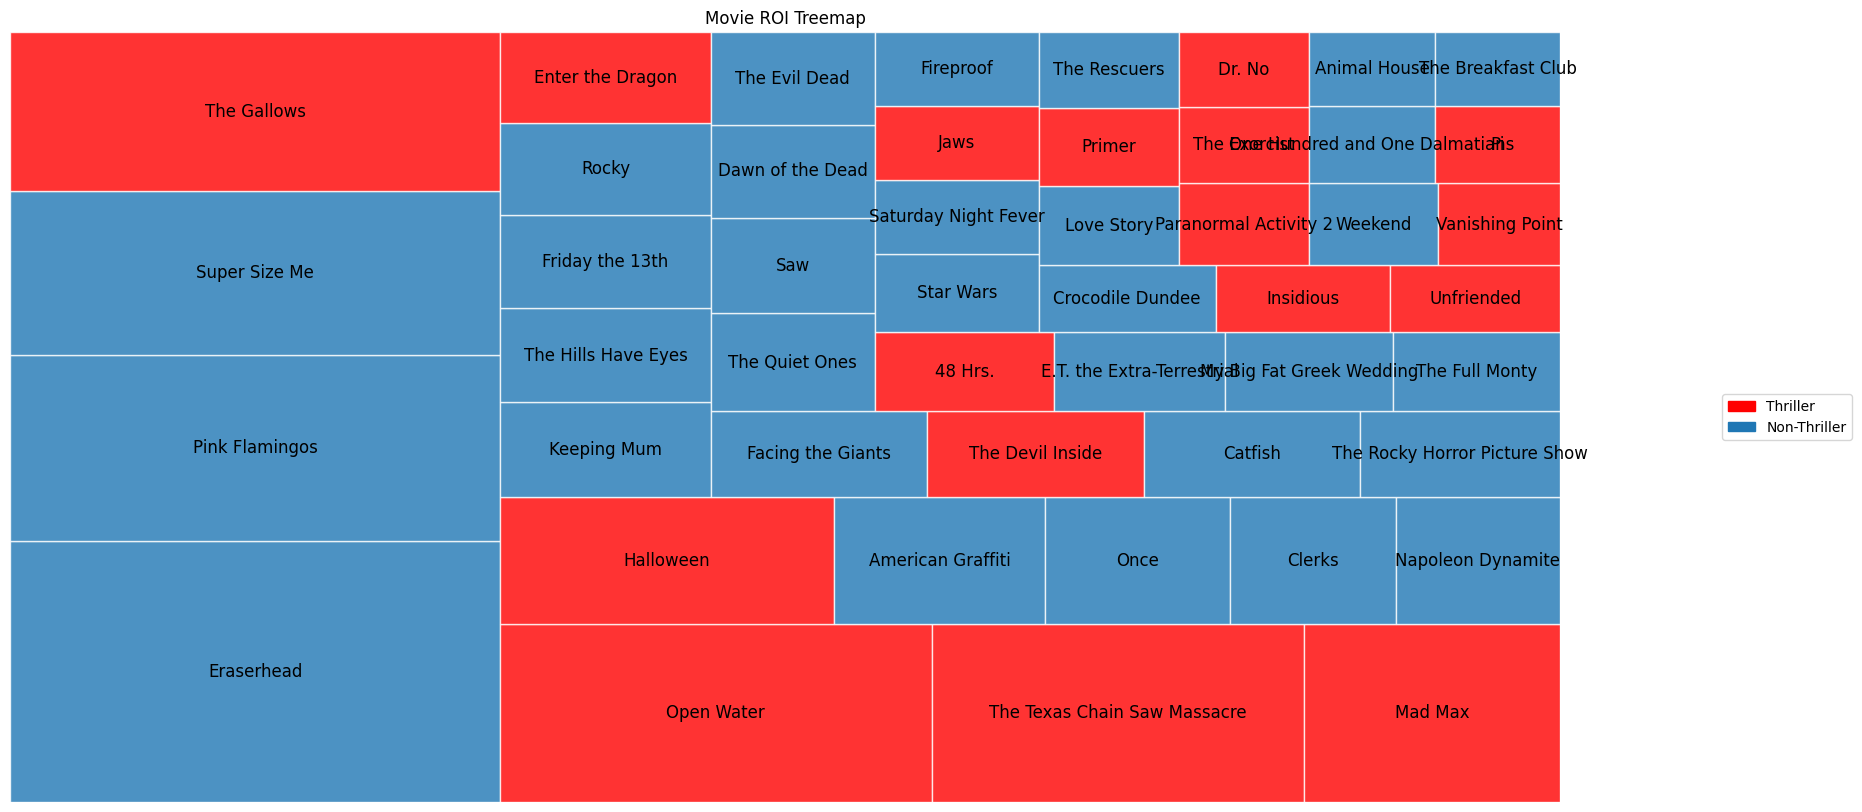

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

# create sample data
# set top 10 revenue movies to different color
top50_movies = df_roi.sort_values('roi', ascending=False).head(50)
top50_movies_title = [row['original_title'] for index, row in top50_movies.iterrows()]
top50_movies_id = [row['imdb_id'] for index, row in top50_movies.iterrows()]

data = top50_movies

df = pd.DataFrame(data[2:])
# df = data

# define color palette
blue = '#1f77b4'

# add color column based on genre
df['color'] = df['genres'].apply(lambda x: 'red' if 'Thriller' in x else blue)

# calculate treemap sizes
sizes = df['roi'].values
labels = df['original_title'].values
colors = df['color'].values

# define function to map square size to font size
def adjust_font_size(size):
    return int(0.05*size)


# create treemap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, edgecolor='white', text_kwargs={'fontsize':12})

# set title and axis labels
plt.title('Movie ROI Treemap')
plt.axis('off')

# add legend
horror_patch = mpatches.Patch(color='red', label='Thriller')
non_horror_patch = mpatches.Patch(color=blue, label='Non-Thriller')
plt.legend(handles=[horror_patch, non_horror_patch], loc='center left', bbox_to_anchor=(1.1, 0.5))

# show plot
plt.show()


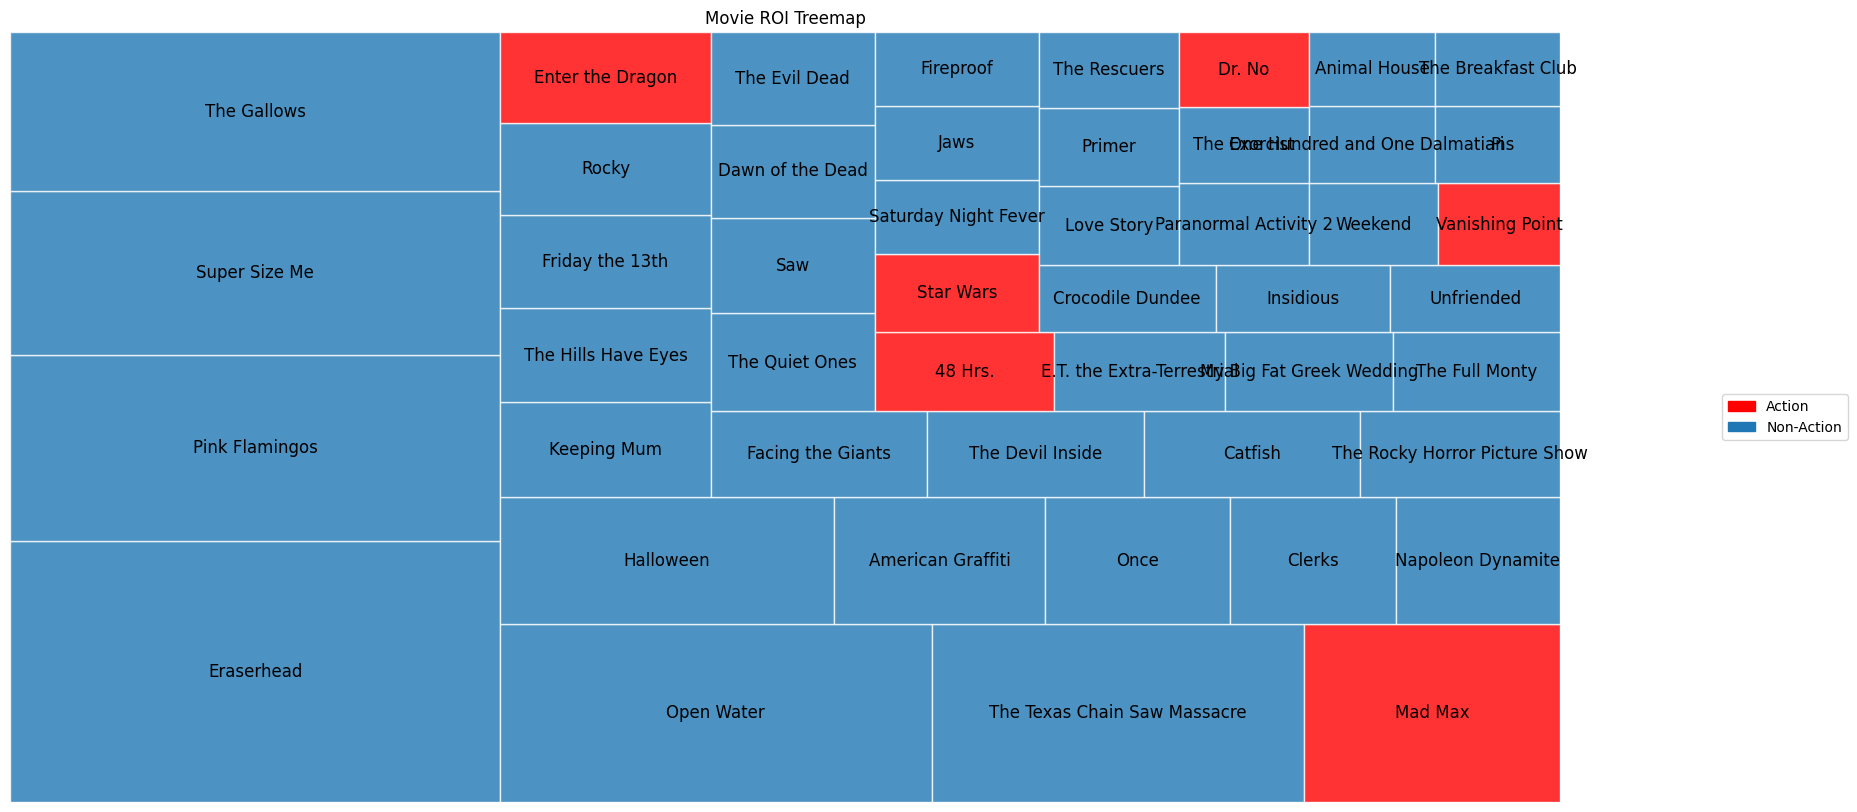

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

# create sample data
# set top 10 revenue movies to different color
top50_movies = df_roi.sort_values('roi', ascending=False).head(50)
top50_movies_title = [row['original_title'] for index, row in top50_movies.iterrows()]
top50_movies_id = [row['imdb_id'] for index, row in top50_movies.iterrows()]

data = top50_movies

df = pd.DataFrame(data[2:])
# df = data

# define color palette
blue = '#1f77b4'

# add color column based on genre
df['color'] = df['genres'].apply(lambda x: 'red' if 'Action' in x else blue)

# calculate treemap sizes
sizes = df['roi'].values
labels = df['original_title'].values
colors = df['color'].values

# define function to map square size to font size
def adjust_font_size(size):
    return int(0.05*size)


# create treemap
plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, edgecolor='white', text_kwargs={'fontsize':12})

# set title and axis labels
plt.title('Movie ROI Treemap')
plt.axis('off')

# add legend
horror_patch = mpatches.Patch(color='red', label='Action')
non_horror_patch = mpatches.Patch(color=blue, label='Non-Action')
plt.legend(handles=[horror_patch, non_horror_patch], loc='center left', bbox_to_anchor=(1.1, 0.5))

# show plot
plt.show()


In [69]:
import sys
sys.path.insert(0, 'src')
import pandas as pd
import matplotlib.pyplot as plt

import mpl_extra.treemap as tr

In [ ]:
# f = pd.DataFrame({'title':list('ABCDEFG'), 
#                    'counts':[100, 30, 25, 2, 2, 2, 2]})
# df['labels'] = [f'{a} - {b}' for a,b in zip(df['title'], df['counts'])]
# plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(20,10), dpi=100, subplot_kw=dict(aspect=1.156))
df['color'] = df['genres'].apply(lambda x: 'red' if 'Horror' in x else blue)

tr.treemap(ax, df, area='roi', labels='original_title', 
           cmap='Set2', fill='color',
           rectprops=dict(ec='w'),
           textprops=dict(c='w'))

ax.axis('off')

## By Tagline

### Pre-processing

- NLP pre-process movie tagline
- Filter top and bottom movies sorted by ROI 

In [95]:
import pandas as pd

df = pd.read_csv('movie_data_roi.csv')

In [96]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import contractions
import unicodedata
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
    
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeSpecial(sentence):
    # Remove special characters using regular expression
    clean_text = re.sub(r'[^\w\s]', '', sentence)
    return clean_text

def removeAccent(sentence):
    # Remove accent characters using the unicodedata module
    no_accent_text = ''.join(char for char in unicodedata.normalize('NFD', sentence) if unicodedata.category(char) != 'Mn')
    return no_accent_text

def removeContraction(sentence):
    # Expand contractions using contractions library
    expanded_text = contractions.fix(sentence)
    return expanded_text

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

def lemmatization(sentence):
    doc = nlp(sentence)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    lemmas = [l.strip() for l in lemmas]
    lemmas = list(filter(len, lemmas))
    return lemmas


In [97]:
df['tagline'] = df['tagline'].str.lower()
df['tagline'] = df['tagline'].apply(cleanHtml)
df['tagline'] = df['tagline'].apply(cleanPunc)
df['tagline'] = df['tagline'].apply(keepAlpha)
df['tagline'] = df['tagline'].apply(removeSpecial)
df['tagline'] = df['tagline'].apply(removeAccent)
df['tagline'] = df['tagline'].apply(removeContraction)
# df['tagline'] = df['tagline'].apply(removeStopWords)
df['tagline'] = df['tagline'].apply(lemmatization)

In [99]:
df['tagline']

0                                      [park, open]
1                                     [lovely, day]
2                                 [choice, destroy]
3                               [generation, story]
4                            [vengeance, hit, home]
                            ...                    
10861                                         [nan]
10862    [cinerama, sweep, drama, speed, spectacle]
10863                                         [nan]
10864                        [woody, allen, strike]
10865                          [shock, imagination]
Name: tagline, Length: 10866, dtype: object

In [100]:
df.to_csv('movie_preprocessed.csv')

In [1]:
import pandas as pd
df = pd.read_csv('movie_preprocessed.csv')

In [2]:
top = df.sort_values('roi', ascending=False).head(50)
bottom = df.sort_values('roi', ascending=False).tail(50)

In [3]:
top[['tagline', 'roi']][:10]

,tagline,roi
7447,"['happen', 'sleep']",12889.386664
2449,"['scary', 'movie', 'time', 'true', 'story']",9919.000003
1354,"['nightmare', 'end']",699.000000
7277,"['exercise', 'poor', 'taste']",499.000000
7178,"['reality', 'base', 'movie', 'begin', 'end', '...",438.616585
242,"['school', 'spirit']",425.644100
7057,"['scream', 'want']",419.522723
9762,"['survive', 'leave']",362.047059
7827,"['maximum', 'force', 'future']",249.000000
10759,"['night', 'come', 'home']",232.333333


In [4]:
bottom[['tagline', 'roi']][:10]

,tagline,roi
10801,"['experience', 'terror', 'suspense']",NaN
10803,['nan'],NaN
10804,['nan'],NaN
10805,['survive'],NaN
10806,"['death', 'living', 'dead']",NaN
10807,['nan'],NaN
10808,"['evil', 'die', 'wait', 'bear']",NaN
10809,['nan'],NaN
10811,['nan'],NaN
10812,"['trap', 'underwater', 'time', 'run']",NaN


In [5]:
print('before filter: ', len(df))
df_filtered = df[df['roi'].notna()]
df_filtered = df_filtered[df_filtered['tagline'].apply(lambda x: 'nan' not in x and len(x) > 0)]
print('after filter: ', len(df_filtered))

before filter:  10866
after filter:  4511


In [6]:
top = df_filtered.sort_values('roi', ascending=False).head(50)
bottom = df_filtered.sort_values('roi', ascending=False).tail(50)

In [7]:
top[['tagline', 'roi']][:10]

,tagline,roi
7447,"['happen', 'sleep']",12889.386664
2449,"['scary', 'movie', 'time', 'true', 'story']",9919.000003
1354,"['nightmare', 'end']",699.000000
7277,"['exercise', 'poor', 'taste']",499.000000
7178,"['reality', 'base', 'movie', 'begin', 'end', '...",438.616585
242,"['school', 'spirit']",425.644100
7057,"['scream', 'want']",419.522723
9762,"['survive', 'leave']",362.047059
7827,"['maximum', 'force', 'future']",249.000000
10759,"['night', 'come', 'home']",232.333333


In [8]:
bottom[['tagline', 'roi']][:10]

,tagline,roi
8059,"['come', 'home']",-1.0
2750,"['war', 'hell', 'peace', 'f', 'boring']",-1.0
8084,"['sex', 'clothe', 'popularity', 'problem']",-1.0
2759,"['young', 'man', 'old', 'woman', 'ex', 'husban...",-1.0
2784,['future'],-1.0
2797,"['love', 'make', 'world', 'round']",-1.0
2811,"['pick', 'wrong']",-1.0
2822,"['small', 'time', 'girl', 'big', 'time', 'drea...",-1.0
7914,"['s', 'head', 'heel', 'head', 'straight', 'tro...",-1.0
7904,"['galaxy', 'heart', 'come', 'supergirl']",-1.0


In [9]:
df_filtered.sort_values('roi', ascending=False).tail(100)[['roi', 'revenue_adj']]

,roi,revenue_adj
7354,-1.0,0.0
3441,-1.0,0.0
3451,-1.0,0.0
3461,-1.0,0.0
3476,-1.0,0.0
...,...,...
7831,-1.0,0.0
3028,-1.0,0.0
3034,-1.0,0.0
7810,-1.0,0.0


In [10]:
print('before filter: ', len(df))
df_filtered = df_filtered[df_filtered['revenue_adj'].apply(lambda x: x > 0)]
print('after filter: ', len(df_filtered))

before filter:  10866
after filter:  3556


In [128]:
top = df_filtered.sort_values('roi', ascending=False).head(100)
bottom = df_filtered.sort_values('roi', ascending=True).head(100)
top[['tagline', 'roi']][:10]

,tagline,roi
7447,"['happen', 'sleep']",12889.386664
2449,"['scary', 'movie', 'time', 'true', 'story']",9919.000003
1354,"['nightmare', 'end']",699.000000
7277,"['exercise', 'poor', 'taste']",499.000000
7178,"['reality', 'base', 'movie', 'begin', 'end', '...",438.616585
242,"['school', 'spirit']",425.644100
7057,"['scream', 'want']",419.522723
9762,"['survive', 'leave']",362.047059
7827,"['maximum', 'force', 'future']",249.000000
10759,"['night', 'come', 'home']",232.333333


In [129]:
bottom[['revenue_adj','tagline', 'roi']][:10]

,revenue_adj,tagline,roi
8142,2.861934,"['shop', 'work']",-1.000000
7158,13.853345,"['fall', 'love', 'world', 'watch']",-0.999999
8226,8.585801,"['world', 'love', 'safe', 'trust', 'deadly']",-0.999999
6707,155.760359,"['unexpected', 'unbelievable', 'unforgettable']",-0.999998
5060,27.263111,"['know', 'desire', 'dead', 'wrong']",-0.999998
4970,296.338161,"['story', 'boy', 'man', 'bear']",-0.999998
9332,124.885242,"['cowabunga', 'new', 'turtle', 'movie']",-0.999997
10294,22.642049,"['evil', 'finally', 'find', 'home']",-0.999995
7506,48.376755,"['director', 'frank', 'oz', 'come', 'story', '...",-0.999995
3239,3.038360,"['ph', 'd', 'horribleness']",-0.999985


### Compare movie taglines

In [130]:
from collections import Counter
import ast

success_tagline_words = [word for tagline in top['tagline'].apply(ast.literal_eval) for word in tagline]
sucess_tagline_word_count = Counter(success_tagline_words)

failure_tagline_words = [word for tagline in bottom['tagline'].apply(ast.literal_eval) for word in tagline]
failure_tagline_word_count = Counter(failure_tagline_words)

In [131]:
common = list(set(success_tagline_words).intersection(failure_tagline_words))
len(common)

72

In [132]:
sucess_tagline_word_count['love']

7

In [143]:
failure_tagline_word_count['love']

6

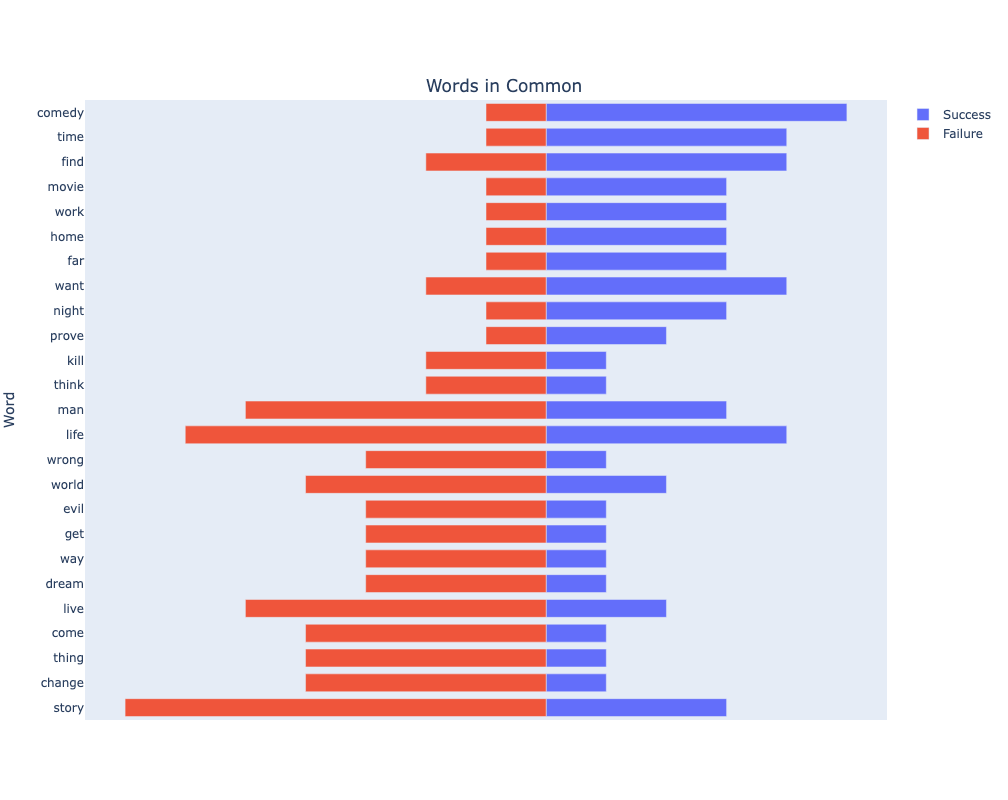

In [142]:
import pandas as pd
import plotly.graph_objects as go

common_word_count_success = [sucess_tagline_word_count[word] for word in common_words]
common_word_count_failure = [failure_tagline_word_count[word] for word in common_words]

all_clean = {'Success': common_word_count_success, 'Failure': common_word_count_failure}
all_clean = pd.DataFrame(all_clean, index=common)

# filter words where LUKE and THREEPIO count > 0
common_words = all_clean[(all_clean['Success'] > 0) & (all_clean['Failure'] > 0)]

# add a column to calculate the difference
common_words['difference'] = abs(common_words['Success'] - common_words['Failure'])

# sort the dataframe by the difference in descending order
common_words = common_words.sort_values('difference', ascending=False)

# select top 25 words
common_words_25 = common_words.head(26)[1:]
# common_words_25 = common_words

# create traces for pyramid plot
trace1 = go.Bar(x=common_words_25['Success'], y=common_words_25.index.tolist(),
                name='Success', orientation='h')
                # text = [f'{common_words_25.loc[i].Success}, {i}' for i in common_words_25.index],
                # hoverinfo='text')

trace2 = go.Bar(x=[-x for x in common_words_25['Failure']], y=common_words_25.index.tolist(),
                name='Failure', orientation='h')
                # , text = [f'{common_words_25.loc[i].Failure}, {i}' for i in common_words_25.index],
                # hoverinfo='text')

# create layout for pyramid plot
layout = go.Layout(barmode='relative', title='Words in Common',
                   xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                   yaxis=dict(title='Word', showgrid=False, zeroline=False, categoryorder='total descending'),
                  width=800, height=800)

# create the figure and plot
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.update_layout(
    title={
        'text': "Words in Common",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    bargap=0.2,
    bargroupgap=0.1)
fig.update_yaxes(categoryorder='total ascending')
fig.show()


In [145]:
!pip install -q transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

In [151]:
success_sentiment = []
for tagline in top['tagline'].apply(ast.literal_eval):
    for word in tagline:
        success_sentiment.append(sentiment_pipeline(word))

In [152]:
failure_sentiment = []
for tagline in bottom['tagline'].apply(ast.literal_eval):
    for word in tagline:
        failure_sentiment.append(sentiment_pipeline(word))

In [177]:
failure_sentiment[0]

[{'label': 'POSITIVE', 'score': 0.96024489402771}]

In [168]:
success_labels = [row[0]['label'] for row in success_sentiment]
failure_labels = [row[0]['label'] for row in failure_sentiment]

In [169]:
set(failure_labels)

{'NEGATIVE', 'POSITIVE'}

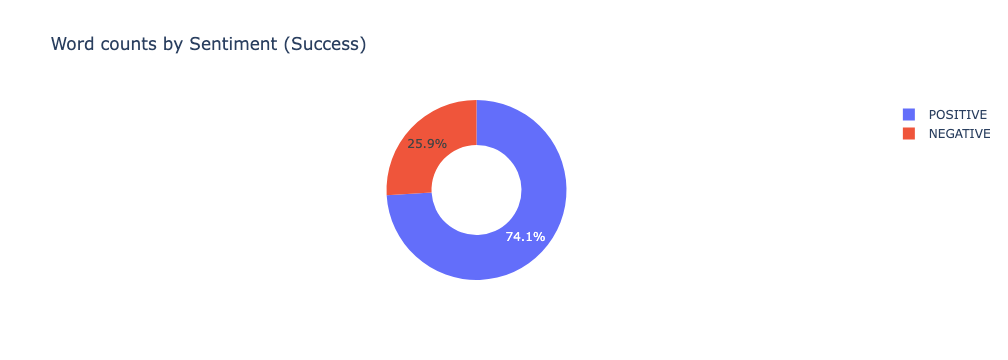

In [176]:
import plotly.express as px
import pandas as pd

# Create sample data
success_data = pd.DataFrame({
    'Sentiment': ['NEGATIVE', 'POSITIVE'],
    'Counts': [sum(1 for l in success_labels if l == 'NEGATIVE'), sum(1 for l in success_labels if l == 'POSITIVE')]
})

# Create pie chart
fig = px.pie(success_data, values='Counts', names='Sentiment', 
             title='Word counts by Sentiment (Success)', 
             hole=0.5)

# Show figure
fig.show()


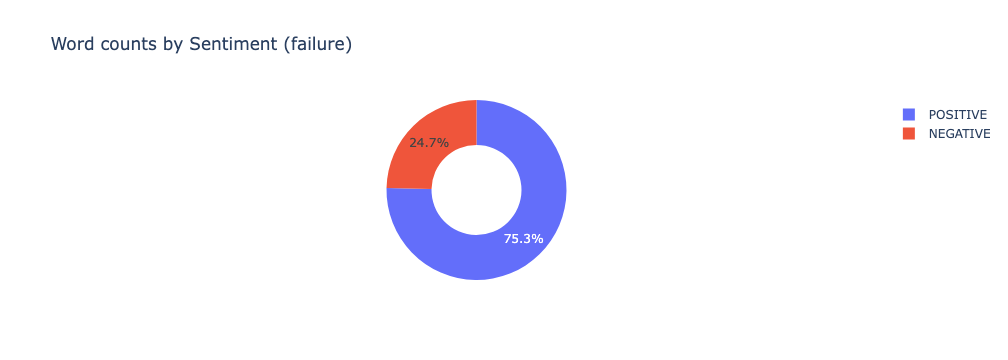

In [175]:
import plotly.express as px
import pandas as pd

# Create sample data
failure_data = pd.DataFrame({
    'Sentiment': ['NEGATIVE', 'POSITIVE'],
    'Counts': [sum(1 for l in failure_labels if l == 'NEGATIVE'), sum(1 for l in failure_labels if l == 'POSITIVE')]
})

# Create pie chart
fig = px.pie(failure_data, values='Counts', names='Sentiment', 
             title='Word counts by Sentiment (failure)', 
             hole=0.5)

# Show figure
fig.show()